### Описание The PMEmo Dataset for Music Emotion Recognition

PMEmo - набор данных, содержащий аннотации arousal и valence для 794 песен, а также данные об электродермальной активности (EDA). Для этого авторы использовали популярные песни, попадающие в различные музыкальные чарты, такие как Billboard Hot 100, iTunes Top 100 Songs и UK Top 40 Singles Chart. 

Датасет содержит: 

- Метаданные песен (название, исполнитель, начало и конец припева)
- Выбранные вручную отрывки припевов в формате MP3
- Вручную аннотированные эмоциональные метки: статические метки для всего отрывка и динамические метки для каждого сегмента продолжительностью 0,5 секунды в диапазоне [0, 1] (аннотации в данной работе были сэмплированы с частотой 2 Гц, что означает, что каждые 0,5 секунды аннотаторы давали свою оценку эмоционального состояния. ). 
- EDA

Всего было набрано 457 участников, среди которых 236 женщин и 221 мужчина. 366 участников - студенты китайских университетов, не обучающиеся музыке, а 44 - студенты музыкальных факультетов, чтобы гарантировать высокое качество маркировки. Кроме того, были приглашены 47 англоговорящих участников для более точной аннотации, так как большинство песен на английском языке. Каждая песня получила не менее 10 аннотаций эмоций, включая одну от студента музыкального факультета и одну от англоговорящего участника. Изначально песни были аннотированы по шкале от 1 до 9, затем все было переведно в диапазон от 0 до 1.

Для оценки надежности авторы датасета используют коэффициент альфа Кронбаха. Если значения коэффициента альфа Кронбаха высокие, то это указывает на то, что аннотации надежны и могут быть использованы в дальнейшем анализе. Если значения низкие, то это может указывать на необходимость повторной аннотации или исправления методологии аннотирования.

Для проекта используется динамическая аннотация arousal и valence с частотой дискретизации 2 гц

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('husl')

In [27]:
def visualization(valence, arousal, out_valence, out_arousal):
  plt.figure(figsize=(4, 4))

  plt.xlim(0, 1)
  plt.ylim(0, 1)

  plt.axvline(x=0.5, color='grey', linestyle='--')
  plt.axhline(y=0.5, color='grey', linestyle='--')

  plt.scatter(valence, arousal)
  plt.scatter(out_valence, out_arousal, color='r')

  plt.xlabel('Valence')
  plt.ylabel('Arousal')

  plt.title('Дж. Рассел: arousal и valence')

  plt.show()

In [36]:
def outliers(series):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    series = series[(series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)]
    return series

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/PMEmo/annotation.csv')

<Axes: xlabel='valence'>

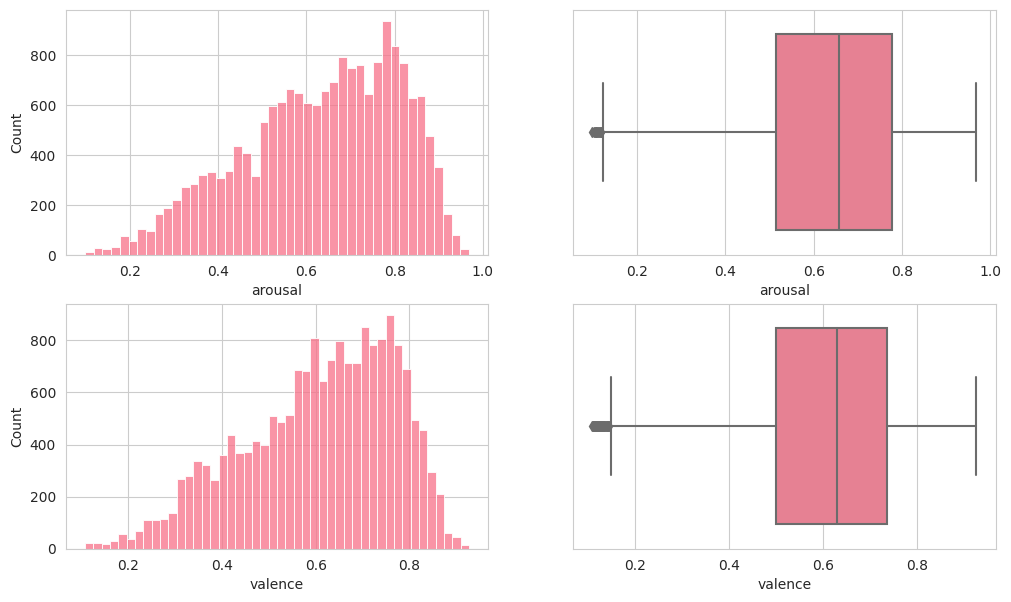

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
sns.histplot(df, x='arousal', ax=axes[0][0])
sns.boxplot(df, x='arousal', ax=axes[0][1])
sns.histplot(df, x='valence', ax=axes[1][0])
sns.boxplot(df, x='valence', ax=axes[1][1])

In [37]:
outliers_index = list(outliers(df['arousal']).index) + list(outliers(df['valence']).index)

In [34]:
outliers_df = df.iloc[outliers_index]

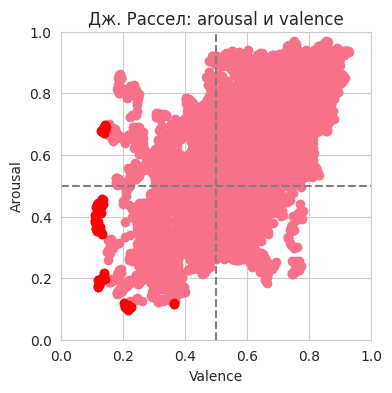

In [35]:
visualization(df['valence'], df['arousal'], outliers_df['valence'], outliers_df['arousal'])

На результаты модели может повлиять положительная асимметрия как валентности, так и возбуждения. Красным выделены "выбросы" - песни с наиболее яркими эмоциями, попадающими во вторую и третью четверти. Чтобы эффективно отразить влияние этих выбросов, мы дополним метрику rmse метрикой mae, которая более точно описывает общую работу модели. Эти выбросы важны, так как они обозначают наиболее эмоционально выраженные и редкие треки. В дальнейшем было решено сбалансировать датасет.